In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Suppose we wish to solve the heat equation in one dimension,

$$ u_t = u_{xx} .$$

After discretizing in space, this is

$$ u_t = L u $$

and this ODE has the exact solution at any time $t$,

$$ u(t) = e^{L t} u(0) . $$

Matrix exponentials are relatively expensive to compute directly, and if we solve using a numerical time integrator, we must either use

* an **explicit** method with time step $\Delta t \le \frac 1 2 (\Delta x)^2$, or
* an **implicit** method with arbitrary time step, but requiring a linear solve.  The linear solve may be cheap in one dimension, but becomes expensive in multiple dimensions (but see multigrid).

## Fourier discretization

Suppose our domain is periodic in the interval $[0,2\pi]$ and consider the basis functions $e^{ikx/n}$.  We'll represent our discrete solution as

$$ u(x) =\sum_{k=0}^{n-1} e^{ikx} \hat u_k . $$

Then the second derivative is known exactly as

$$ u_{xx}(x) = \sum_{k=-n/2}^{n/2-1} e^{ikx} (-k^2) \hat u_k . $$

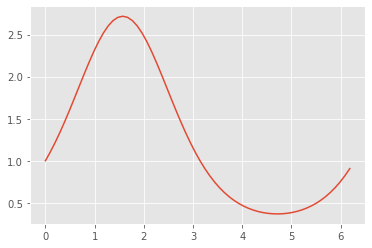

In [37]:
from numpy import exp, sin, cos

n = 64
h = 2 * np.pi / n
x = h * np.arange(n)
u = exp(sin(x))
plt.plot(x, u);

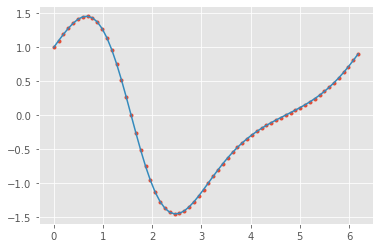

In [38]:
uhat = np.fft.fft(u)
k = np.hstack([np.arange(n//2), [0], np.arange(-n//2+1,0)])
what = 1j*k * uhat

plt.plot(x, np.fft.ifft(what), '.')
plt.plot(x, exp(sin(x))*cos(x));

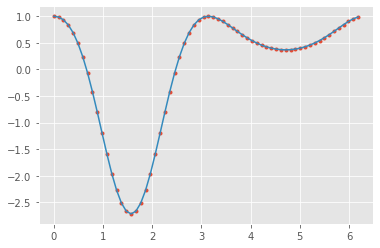

In [41]:
# Second derivative
what = -k**2 * uhat
plt.plot(x, np.fft.ifft(what), '.')
plt.plot(x, exp(sin(x))*cos(x)**2 - exp(sin(x))*sin(x));

With the forward transform $\hat u = F u$, we've computed the second derivative

$$ u_{xx} = L u = F^{-1} \hat L \hat u = \underbrace{F^{-1} \hat L F}_{L} u $$

where $\hat L$ is the diagonal operator $-k^2$.

We can transform our original problem into Fourier space as

$$ \hat u_t = \hat L \hat u $$

which can be evaluated at arbitrary time $t$ via

$$ \hat u(t) = e^{\hat L t} \hat u(t=0) . $$

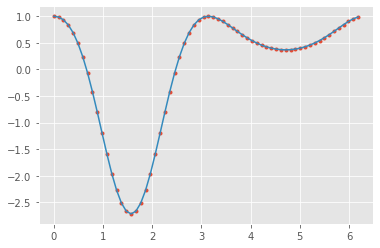

In [44]:
def fftdiff2(u):
    uhat = np.fft.rfft(u)
    k = np.arange(len(uhat))
    return np.fft.irfft(-k**2 * uhat)

plt.plot(x, fftdiff2(u), '.')
plt.plot(x, exp(sin(x))*cos(x)**2 - exp(sin(x))*sin(x));

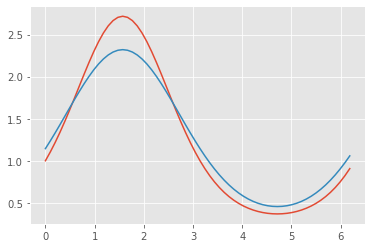

In [47]:
def fftode(u, t):
    uhat = np.fft.rfft(u)
    k = np.arange(len(uhat))
    what = np.exp(-k**2 * t) * uhat
    return np.fft.irfft(what)

plt.plot(x, u)
plt.plot(x, fftode(u, .2));